# Wine Quality Data Analysis
### Ethan DeMelo<br> 23 June, 2024

## Data Introduction
<p>
Wine has various chemical properties that can affect the quality of the wine. This dataset will review different properties of different red and white wines. It can be found and downloaded here: https://archive.ics.uci.edu/dataset/186/wine+quality <br>
This dataset can be used for both classification and regression, but I will be focusing on the classification model and will be focusing on the white wine<br>
Attribute Information (target):
</p>

<ol>
<li>quality
</ol>
Real-valued features are computed for each cell
<ol>
<li>fixed_acidity
<li>volatile_acidity
<li>citric_acid
<li>residual_sugar
<li>chlorides
<li>free_sulfur_dioxide
<li>total_sulfur_dioxide
<li>density
<li>pH
<li>sulphates
<li>alcohol
</ol>


### Data Cleaning and Preprocessing

In [7]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# Import file as a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Datasets/wine_quality/winequality-white.csv", delimiter=';')
df
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


All columns have the correct data type for each value, and no columns are missing any data. All columns are a numeric value for decision tree generation

### Preliminary Data Analysis

In [9]:
num_rows, num_cols = df.shape
print("Number of rows: ", num_rows)
print("Number of cols: ", num_cols)
print(df.columns)
print(df.index)
print(df.values)
print(df.describe())

Number of rows:  4898
Number of cols:  12
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
RangeIndex(start=0, stop=4898, step=1)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%

Here we can see how many columns and rows there are in this data set, and what data is in each column. We can also see some basic statistics such as total count, mean, max and min of some of the columns.

### Exploratory Analysis

<Axes: ylabel='Frequency'>

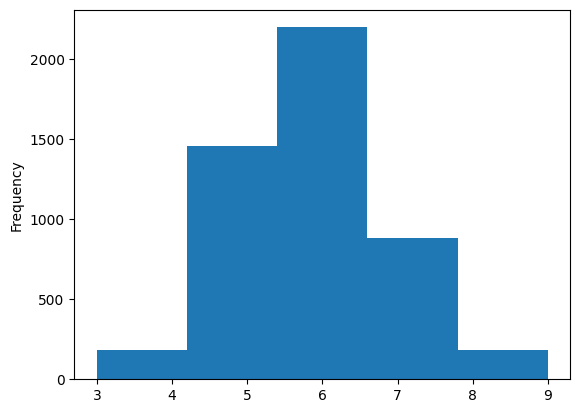

In [10]:
df['quality'].plot.hist(bins=5)

<Axes: ylabel='Density'>

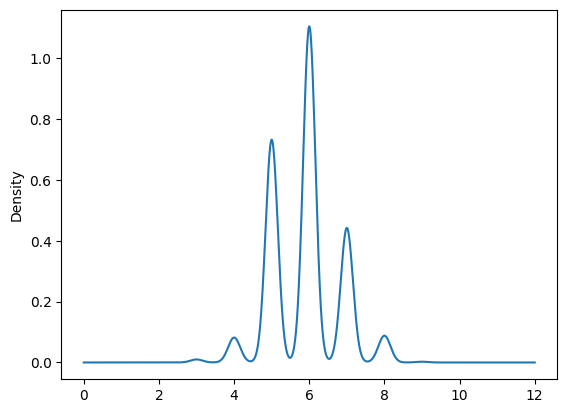

In [11]:
df['quality'].plot.kde()

Above are 2 different plots. The first is a histogram, the second is a density plot. They both display the same information, but the density plot shows it in a continuous format. 

<Axes: xlabel='quality'>

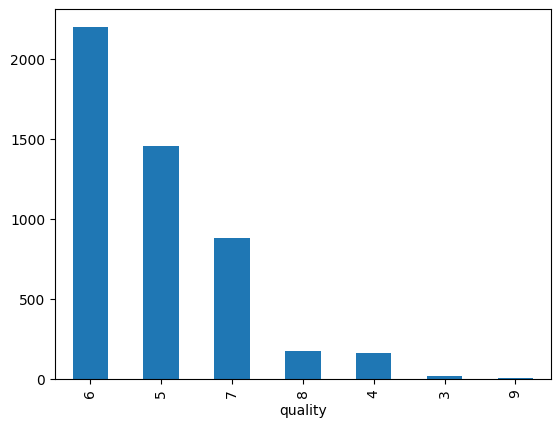

In [12]:
df['quality'].value_counts().plot.bar()

Here we can see a bar chart that shows the quantity of each value in the quality column

<Axes: ylabel='count'>

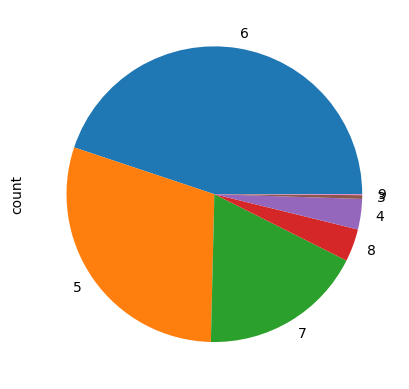

In [13]:
plot_series = df['quality']
plot_series.name = ''
plot_series.value_counts().plot.pie()

<p>Here we can see a pie chart that shows the distributions of each value in the quantity column.<br>
By looking at the distribution, we see that there are many more quality values '6' than there are 9, 4, and 8. This means that the data is imbalanced.

</p>

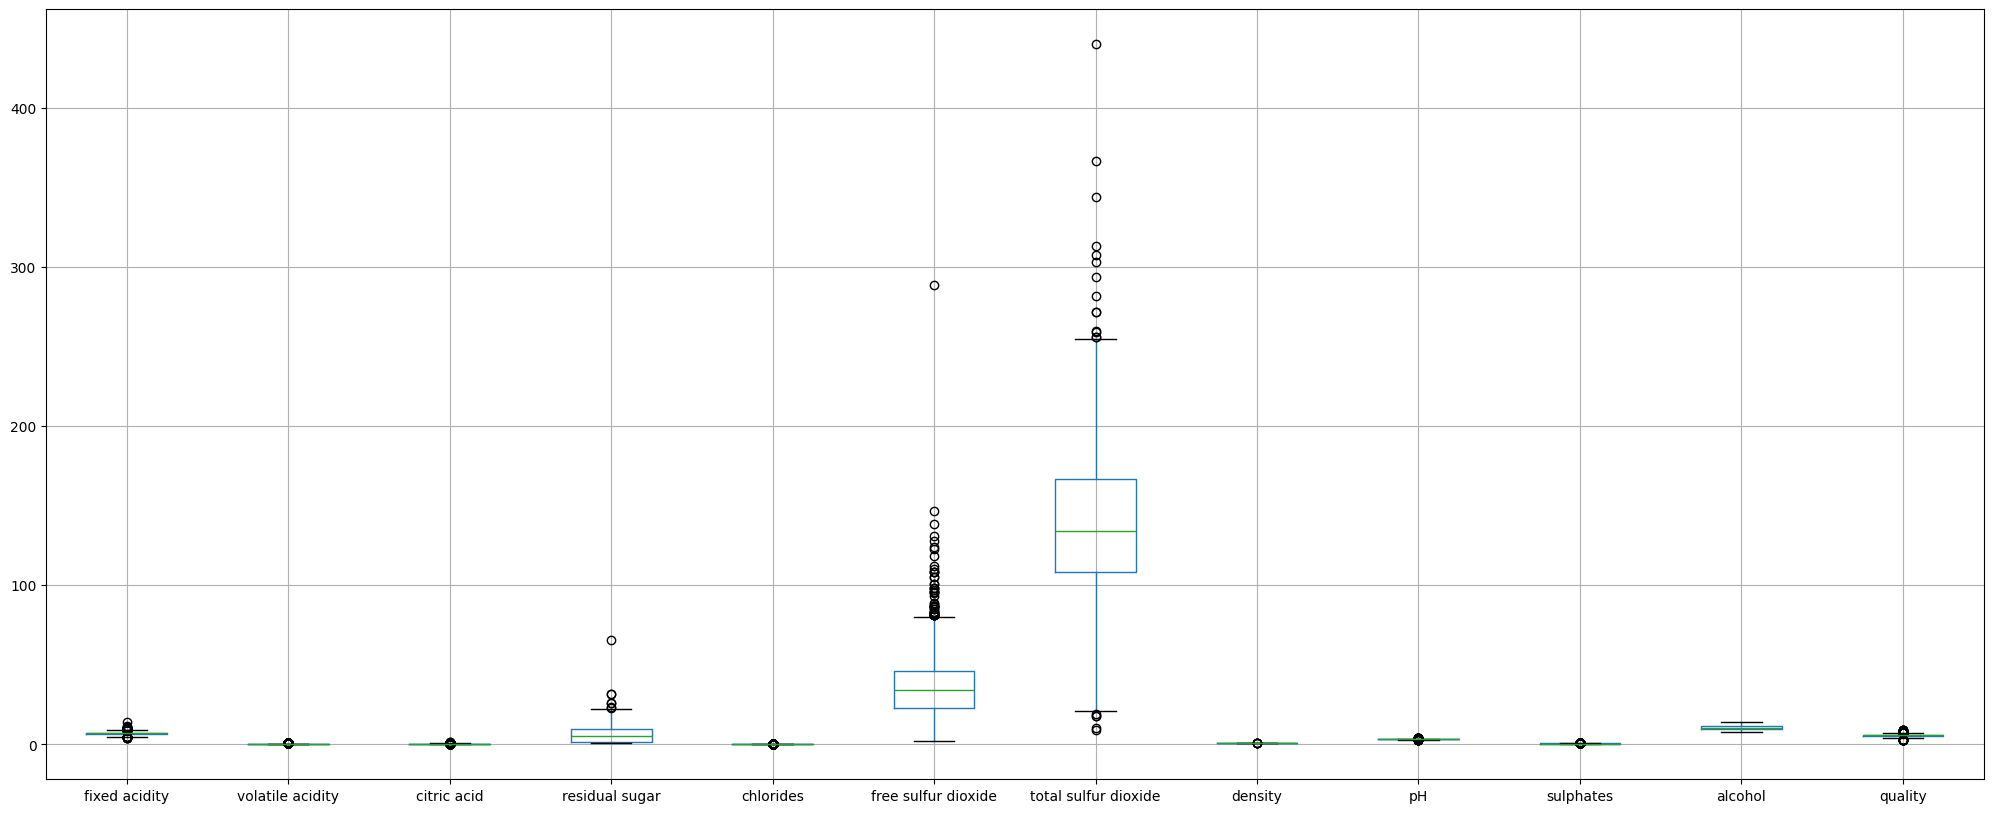

In [14]:
df.boxplot(figsize=(25,10))
plt.show()

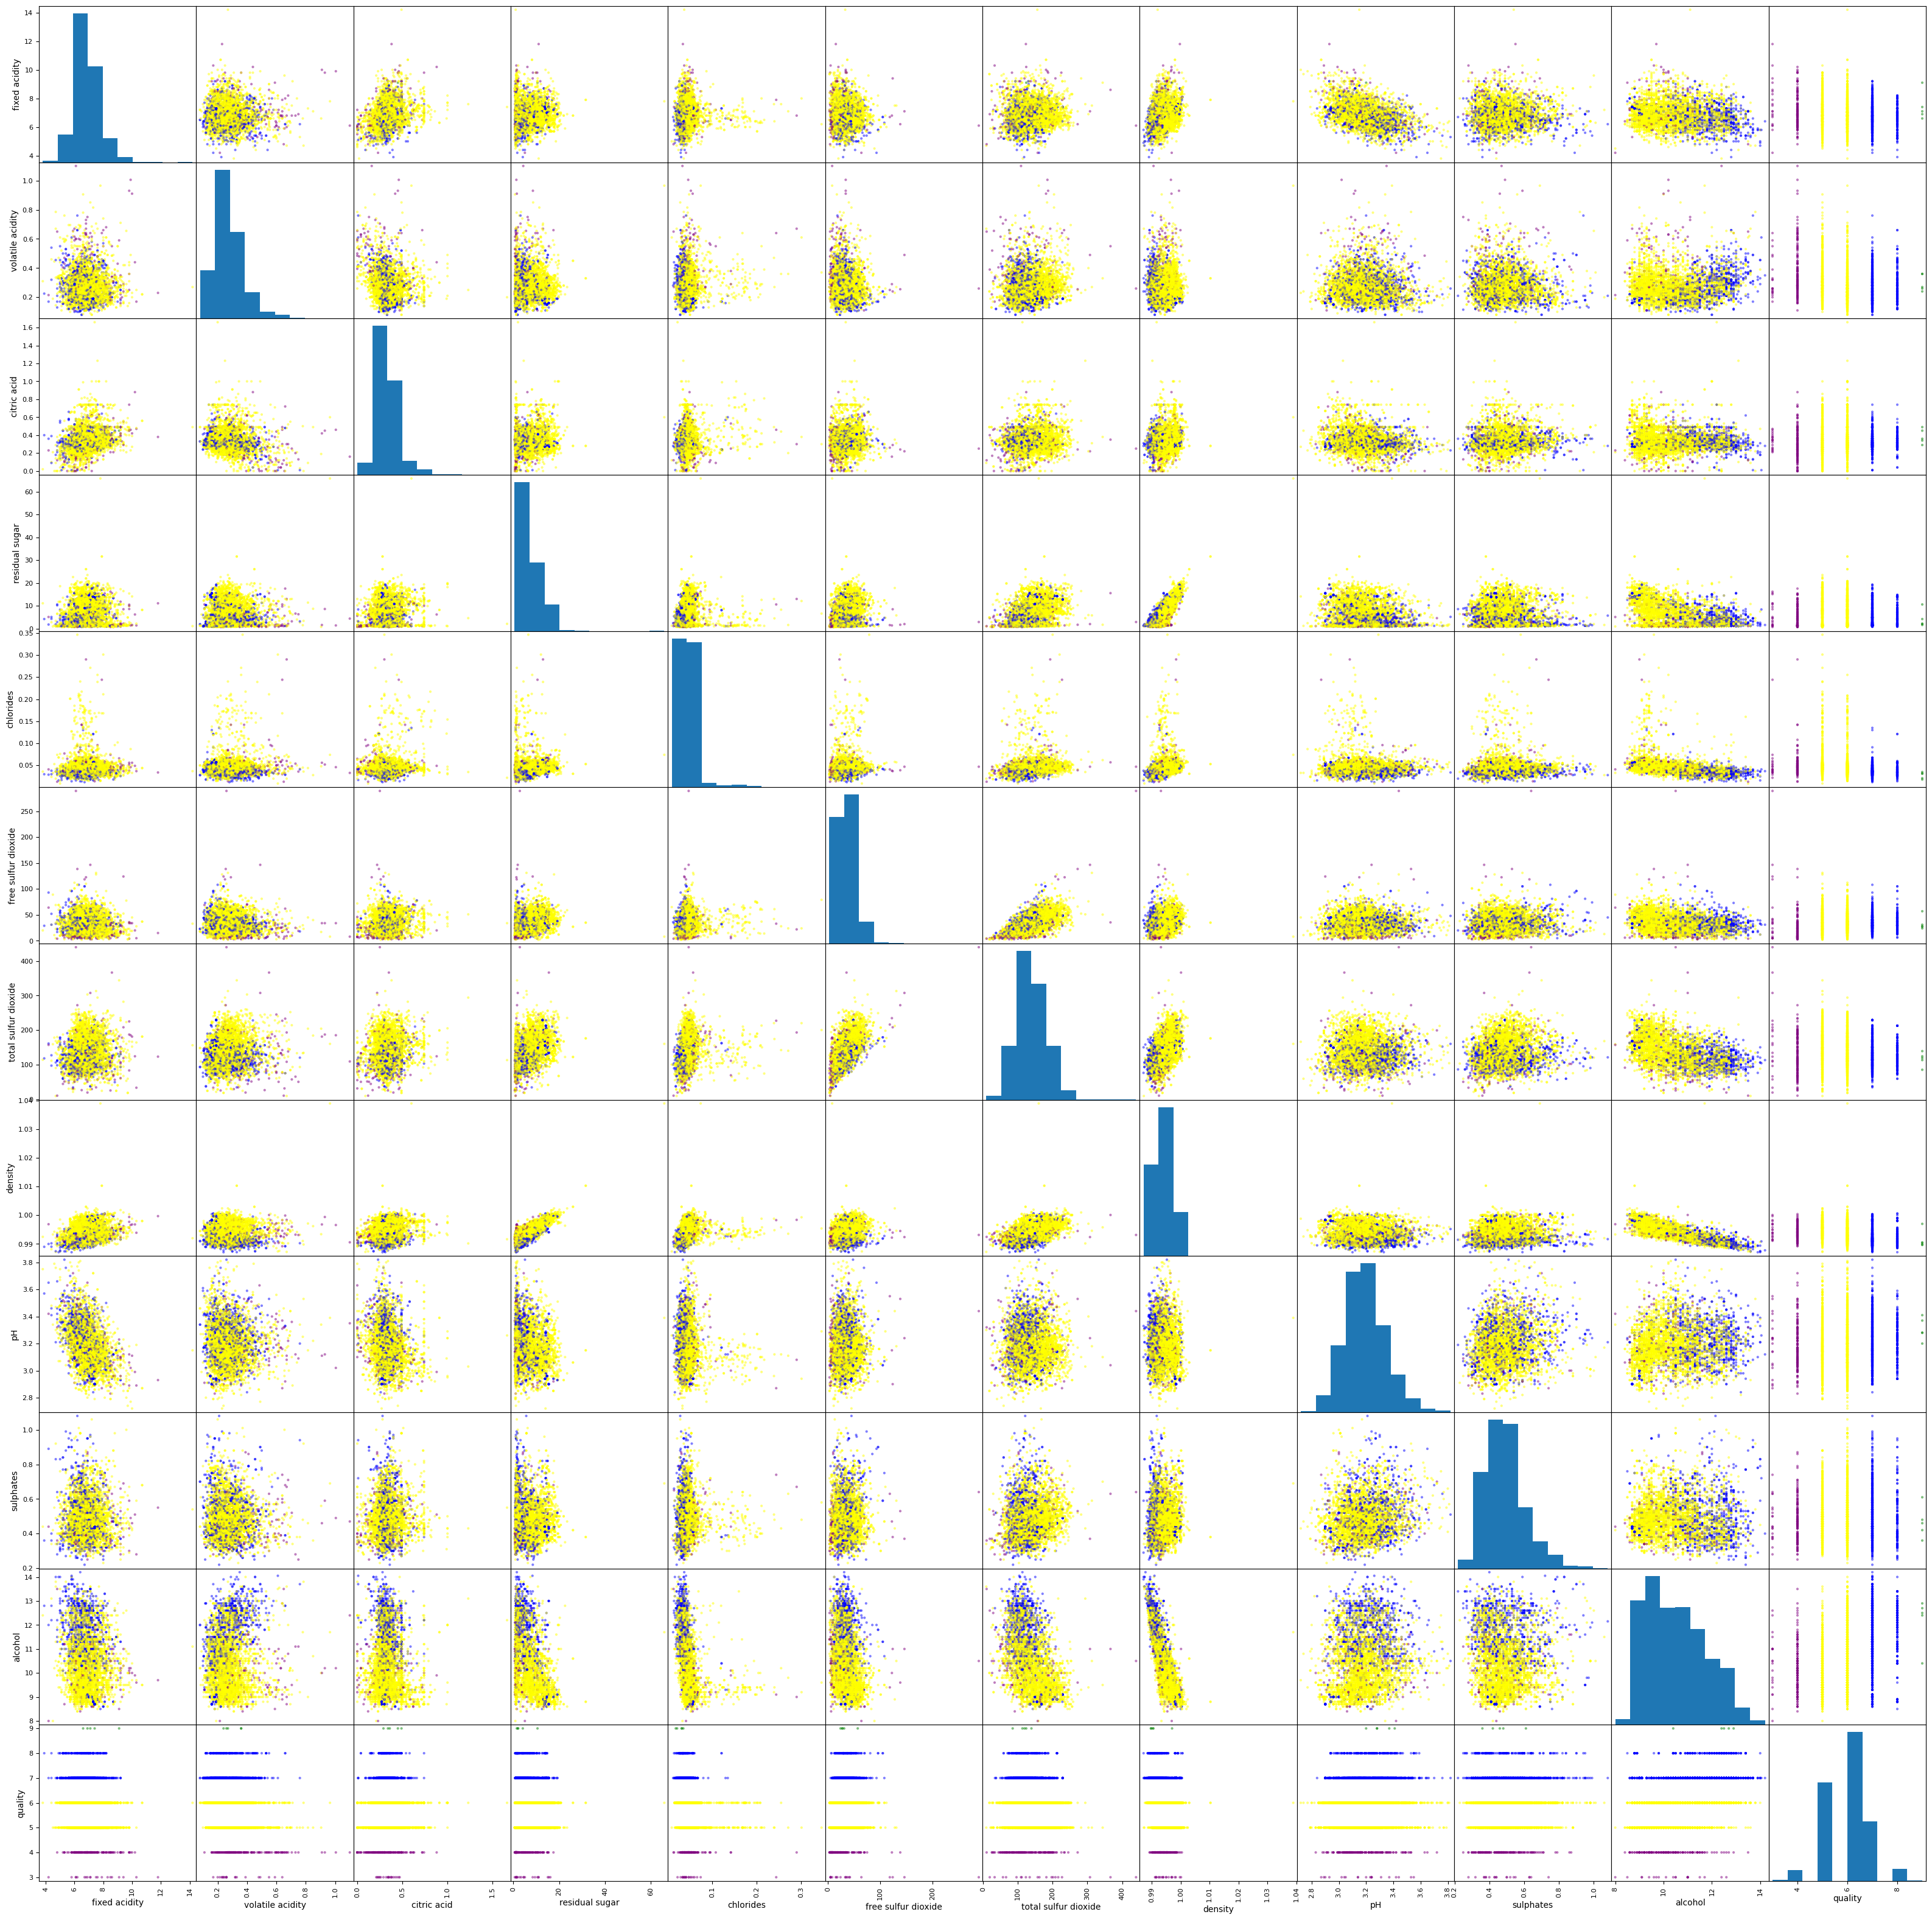

In [15]:
def fn_color(x):
  if x <= 2:
    return 'red'
  elif x <= 4:
    return 'purple'
  elif x <= 6:
    return 'yellow'
  elif x <= 8:
    return 'blue'
  else:
    return 'green'
  
color_vector = df['quality'].map(fn_color)

null = pd.plotting.scatter_matrix(df, figsize=[40,40], c=color_vector)

Here we can see a scatter matrix to view all pairwise relationships

After taking a look at all of the different visualizations, we can see a clear imbalance in the data. For the quality column, there are more values equal to 6 than there are values 8, and 9. We can see that there are mostly highver values of total sulfur dioxide than there are in any other parameters, however there are no clear trends in the data. 

### Build Models

In [16]:
features = df.drop('quality', axis=1)
target = df.quality

In [17]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

## Model Complexity
### Low Complexity tree

Train Accuracy: 0.45
Test Accuracy: 0.44


[Text(0.5, 0.75, 'alcohol <= 10.85\nentropy = 1.864\nsamples = 3918\nvalue = [15, 138, 1166, 1766, 688, 140, 5]'),
 Text(0.25, 0.25, 'entropy = 1.663\nsamples = 2475\nvalue = [8.0, 109.0, 1028.0, 1081.0, 219.0, 29.0, 1.0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 1.82\nsamples = 1443\nvalue = [7.0, 29.0, 138.0, 685.0, 469.0, 111.0, 4.0]'),
 Text(0.625, 0.5, '  False')]

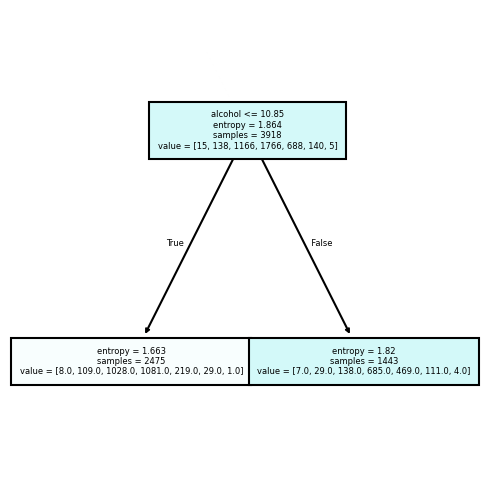

In [18]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print("Train Accuracy: {:3.2f}".format(accuracy_score(Y_train, pred_train)))

print("Test Accuracy: {:3.2f}".format(accuracy_score(Y_test, pred_test)))

# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(4,4), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=1,
               feature_names= features.columns)

Unrestricted, high-complexity model

Train Accuracy: 1.00
Test Accuracy: 0.60


[Text(0.5090474125265042, 0.9791666666666666, 'alcohol <= 10.85\nentropy = 1.864\nsamples = 3918\nvalue = [15, 138, 1166, 1766, 688, 140, 5]'),
 Text(0.29389231608383015, 0.9375, 'volatile acidity <= 0.267\nentropy = 1.663\nsamples = 2475\nvalue = [8.0, 109.0, 1028.0, 1081.0, 219.0, 29.0, 1.0]'),
 Text(0.4014698643051672, 0.9583333333333333, 'True  '),
 Text(0.12855118001352098, 0.8958333333333334, 'volatile acidity <= 0.207\nentropy = 1.637\nsamples = 1308\nvalue = [4.0, 21.0, 381.0, 691.0, 185.0, 26.0, 0.0]'),
 Text(0.03716735295925266, 0.8541666666666666, 'alcohol <= 8.95\nentropy = 1.701\nsamples = 581\nvalue = [2.0, 10.0, 114.0, 319.0, 115.0, 21.0, 0.0]'),
 Text(0.00442505070370598, 0.8125, 'pH <= 2.92\nentropy = 1.89\nsamples = 43\nvalue = [0.0, 0.0, 5.0, 14.0, 9.0, 15.0, 0.0]'),
 Text(0.001966689201647102, 0.7708333333333334, 'chlorides <= 0.069\nentropy = 0.469\nsamples = 10\nvalue = [0, 0, 0, 1, 9, 0, 0]'),
 Text(0.000983344600823551, 0.7291666666666666, 'entropy = 0.0\nsample

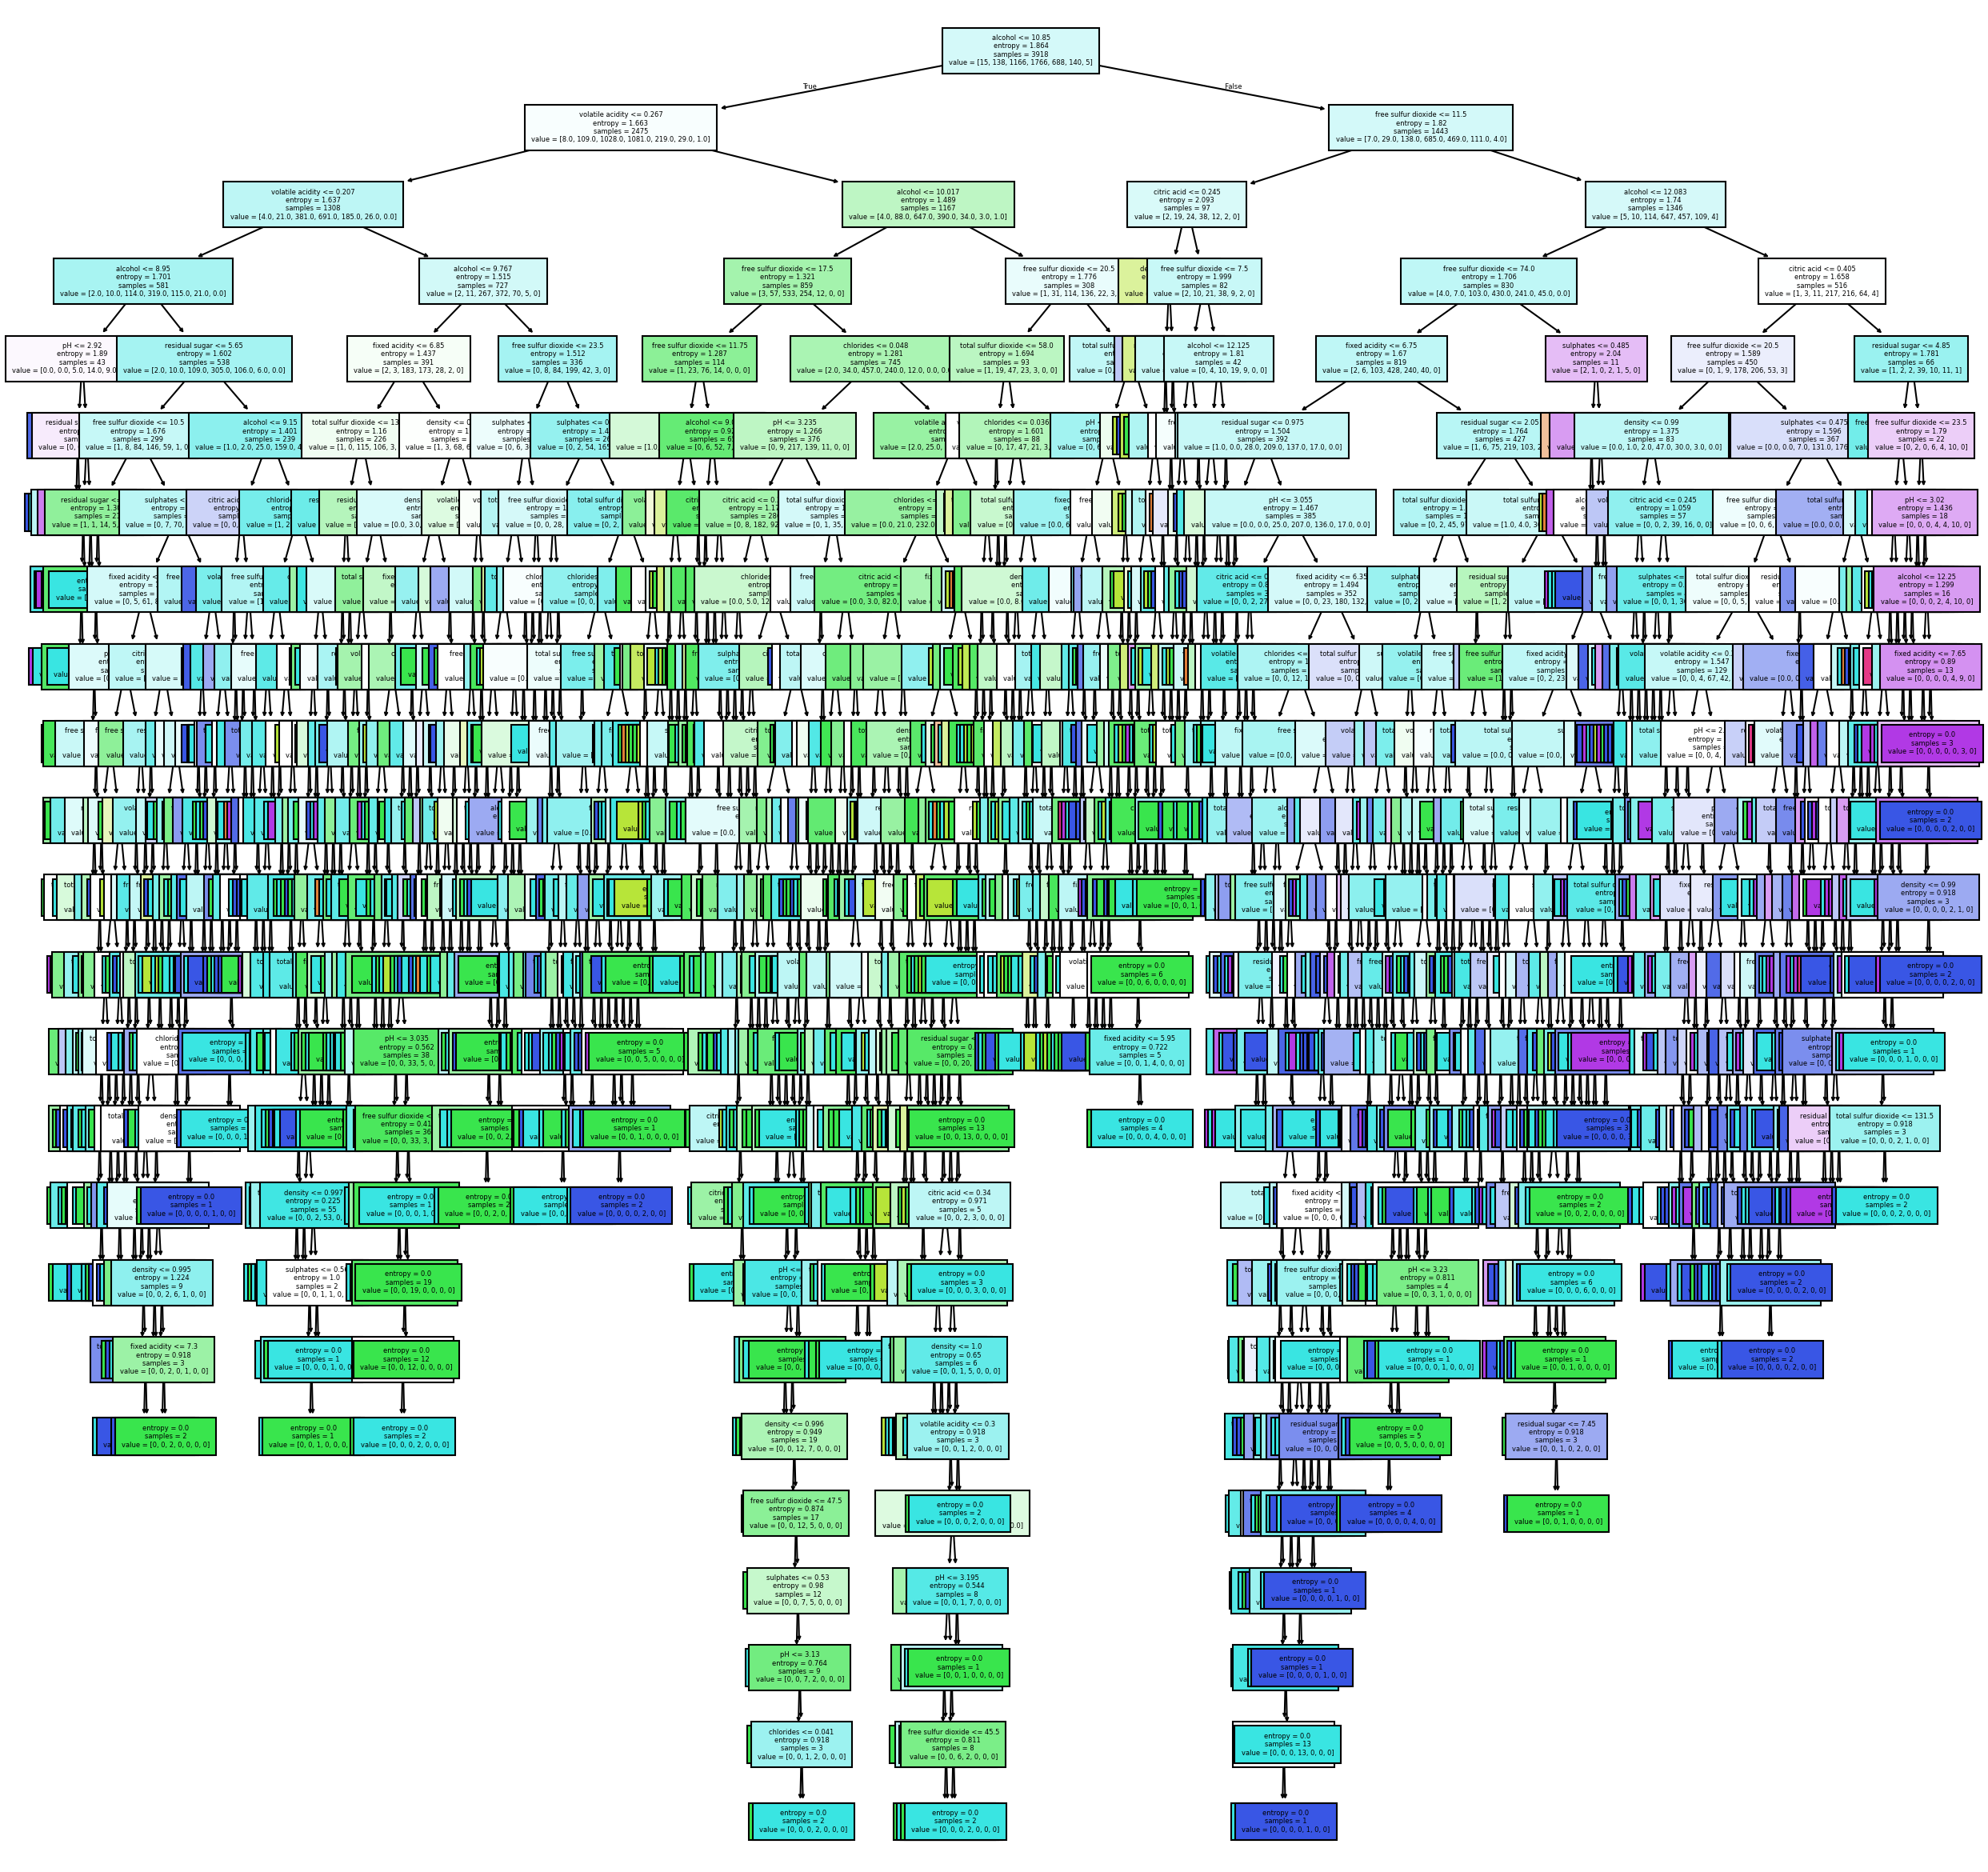

In [19]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print("Train Accuracy: {:3.2f}".format(accuracy_score(Y_train, pred_train)))

print("Test Accuracy: {:3.2f}".format(accuracy_score(Y_test, pred_test)))

# Visualize the decision tree model
fig, axes = plt.subplots(1, 1, figsize=(20,20), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               feature_names= features.columns)

There is 1 comparison being made. The low complexity model is underfitting because it does not have a high enough training or testing accuracy, therefor it does not capture the trend of our dataset. This decision model attempts to predict the quality of the wine.
The unrestricted model is overfitting as its training accuracy is 1.0 meaning it is memorization more than it is learning patterns. In order to prevent overfitting you could restrict the size of the model.

### Grid Search with cross validation

In [20]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X_train, Y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))
scores = cross_val_score(dtree, X_train, Y_train,cv=cv)
print("Accuracy: {:3.2f}".format(scores.mean()))

Best parameters: {'criterion': 'gini', 'max_depth': 10}
Accuracy: 0.58


The optimal classifier is gini and the best parameters are max_depth: 10

I've performed cross-validation in order to help prevent overfitting and determine what the best parameters are for our model.
The mean accuracy is 0.54

The medium complexity model is the best as it has the highest accuracy without the risk of memorization

### Ten percent worse model

Train Accuracy: 0.66
Test Accuracy: 0.53


[Text(0.525, 0.9444444444444444, 'alcohol <= 10.85\nentropy = 1.864\nsamples = 3918\nvalue = [15, 138, 1166, 1766, 688, 140, 5]'),
 Text(0.2983778625954199, 0.8333333333333334, 'volatile acidity <= 0.267\nentropy = 1.663\nsamples = 2475\nvalue = [8.0, 109.0, 1028.0, 1081.0, 219.0, 29.0, 1.0]'),
 Text(0.41168893129770995, 0.8888888888888888, 'True  '),
 Text(0.12767175572519085, 0.7222222222222222, 'volatile acidity <= 0.207\nentropy = 1.637\nsamples = 1308\nvalue = [4.0, 21.0, 381.0, 691.0, 185.0, 26.0, 0.0]'),
 Text(0.0416030534351145, 0.6111111111111112, 'alcohol <= 8.95\nentropy = 1.701\nsamples = 581\nvalue = [2.0, 10.0, 114.0, 319.0, 115.0, 21.0, 0.0]'),
 Text(0.013740458015267175, 0.5, 'pH <= 2.92\nentropy = 1.89\nsamples = 43\nvalue = [0.0, 0.0, 5.0, 14.0, 9.0, 15.0, 0.0]'),
 Text(0.0061068702290076335, 0.3888888888888889, 'chlorides <= 0.069\nentropy = 0.469\nsamples = 10\nvalue = [0, 0, 0, 1, 9, 0, 0]'),
 Text(0.0030534351145038168, 0.2777777777777778, 'entropy = 0.0\nsamples 

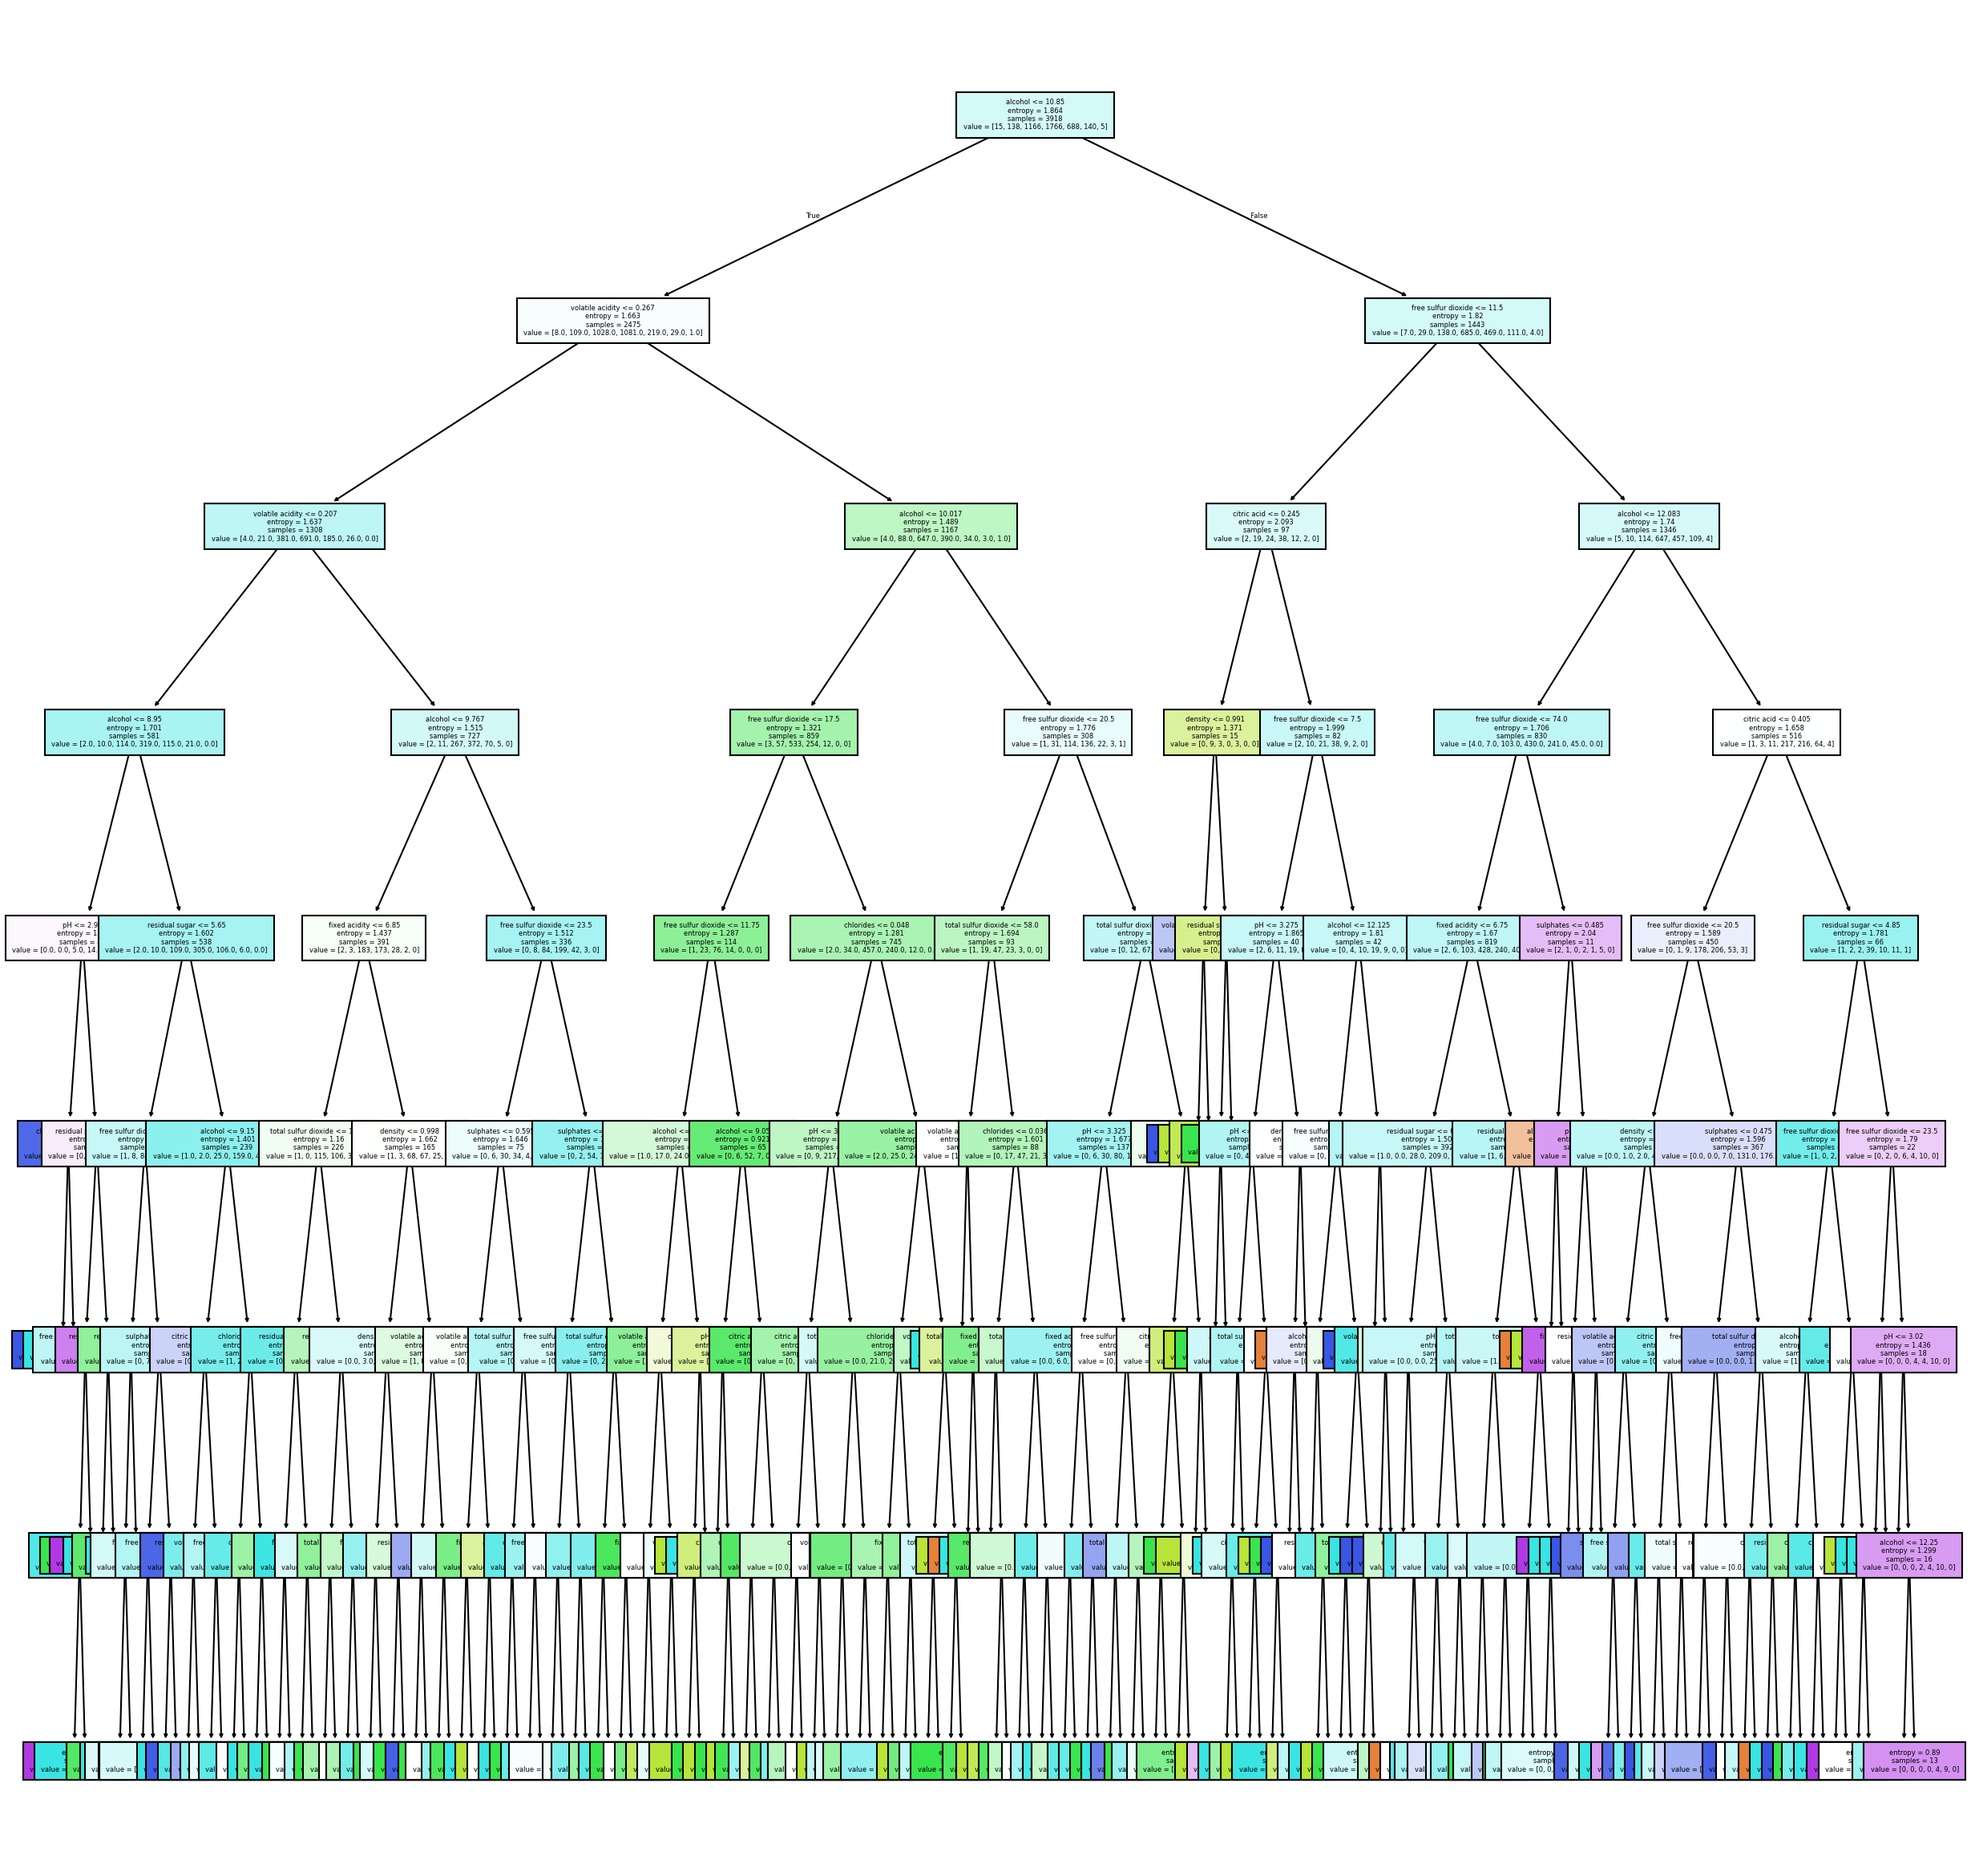

In [21]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8)

dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print("Train Accuracy: {:3.2f}".format(accuracy_score(Y_train, pred_train)))

print("Test Accuracy: {:3.2f}".format(accuracy_score(Y_test, pred_test)))
# Visualize the decision tree model
fig, axes = plt.subplots(1, 1, figsize=(20,20), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
          max_depth=8,
          feature_names= features.columns)

This model is slightly less than 10% worse than the medium complexity model. It does not provide any clear insights or patterns that are deeper than the medium complexity model

### Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score

def model_metrics(y_true, y_predict):
  accuracy= accuracy_score(y_true, y_predict)
  precision=precision_score(y_true, y_predict, average='micro')
  recall=recall_score(y_true, y_predict, average='micro')
  f1=f1_score(y_true, y_predict, average='micro')
  balanced_accuracy=balanced_accuracy_score(y_true, y_predict)
  return [accuracy, precision, recall, f1, balanced_accuracy]

In [23]:
# Medium Complexity
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

med_train_metrics = model_metrics(Y_train, pred_train)
med_test_metrics = model_metrics(Y_test, pred_test)

# Ten Percent Less
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8)

dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

tpl_train_metrics = model_metrics(Y_train, pred_train)
tpl_test_metrics = model_metrics(Y_test, pred_test)

df_medium = pd.DataFrame([med_train_metrics], columns = ['Accuracy','Precision','Recall','F1 score', 'Balanced_accuracy'], index=['Train','Test'])
df_tpl = pd.DataFrame([tpl_train_metrics], columns = ['Accuracy','Precision','Recall','F1 score', 'Balanced_accuracy'], index=['Train','Test'])
all_metrics_values = {'Medium Complexity:': df_medium,
    "Ten-Percent Less Complexity:": df_tpl}
all_metrics_values

{'Medium Complexity:':        Accuracy  Precision    Recall  F1 score  Balanced_accuracy
 Train  0.734814   0.734814  0.734814  0.734814           0.563142
 Test   0.734814   0.734814  0.734814  0.734814           0.563142,
 'Ten-Percent Less Complexity:':        Accuracy  Precision    Recall  F1 score  Balanced_accuracy
 Train  0.659775   0.659775  0.659775  0.659775           0.456259
 Test   0.659775   0.659775  0.659775  0.659775           0.456259}

In [24]:
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# compute 95% confidence intervals for classification and regression
# problems

def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [26]:
dtree_med = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)


X_train_med = X_train
Y_train_med = Y_train
X_test_med = X_test
Y_test_med = Y_test
dtree_med.fit(X_train_med, Y_train_med)

pred_train_med = dtree_med.predict(X_train_med)
pred_test_med = dtree_med.predict(X_test_med)

med_train_metrics = model_metrics(Y_train_med, pred_train_med)
med_test_metrics = model_metrics(Y_test_med, pred_test_med)

# tpl
dtree_tpl = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

X_train_tpl = X_train
Y_train_tpl = Y_train
X_test_tpl = X_test
Y_test_tpl = Y_test

dtree_tpl.fit(X_train_tpl, Y_train_tpl)

pred_train_tpl = dtree_tpl.predict(X_train_tpl)
pred_test_tpl = dtree_tpl.predict(X_test_tpl)

med_train_metrics = model_metrics(Y_train_tpl, pred_train_tpl)
med_test_metrics = model_metrics(Y_test_tpl, pred_test_tpl)

Medium Confusion Matrix

In [31]:
pred_test = grid.best_estimator_.predict(X_test_med)
acc = accuracy_score(Y_test_med, pred_test_med)
lb,ub = classification_confint(acc,X_test_med.shape[0])

labels = list(target.unique())
cm = confusion_matrix(y_true= Y_test_med,y_pred= pred_test_med, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Y_test_med.value_counts()

Confusion Matrix:
     6    5   7   8  4  3  9
6  272  101  47   3  8  1  0
5   92  176  14   1  6  2  0
7   95    5  80  11  1  0  0
8   12    1  14   8  0  0  0
4    7   10   0   0  8  0  0
3    2    2   0   0  1  0  0
9    0    0   0   0  0  0  0



6    432
5    291
7    192
8     35
4     25
3      5
Name: count, dtype: int64

Ten Percent Less Confusion Matrix

In [34]:
pred_test = grid.best_estimator_.predict(X_test_tpl)
acc = accuracy_score(Y_test_tpl, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])

labels = list(target.unique())
cm = confusion_matrix(y_true= Y_test_tpl,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Y_test_tpl.value_counts()

Confusion Matrix:
     6    5   7   8  4  3  9
6  274  102  46   1  8  1  0
5   94  176  13   1  5  2  0
7   97    5  78  11  1  0  0
8   12    2  12   9  0  0  0
4    8    8   1   0  8  0  0
3    2    2   0   0  1  0  0
9    0    0   0   0  0  0  0



6    432
5    291
7    192
8     35
4     25
3      5
Name: count, dtype: int64

The ten percent less model appears to produce the most number of false positives. If this dataset were of something more important such as medical diagnosis, then having these false positives could have drastically negative effects such as improper treatment, or misdiagnosis.

It appears that the ten-percent-less model is more complex. Neither model appears to conform to the 95% confidence interval as this dataset was not originally designed to be a classification model.
I would choose the medium model as it is slightly more accurate which would result in better determination of the wine's quality